<a href="https://colab.research.google.com/github/AlphaKaba24/African_Economy_Prediction/blob/main/africa_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AFRICAN GDP GROWTH PER YEAR**
##Alpha Kaba //

##**Import Libraries/Load Data**

In [610]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [555]:
africa_df = pd.read_csv('/content/ObservationData_lavlqce.csv')
africa_df.head()

,Country,Year,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
0,Malawi,1980,NaN,NaN,3038.14,2236.36,1104.30,238.76,865.54,306.24,...,21.48,-142.96,298.61,441.57,-6.39,13.35,19.75,-207.07,-9.26,NaN
1,Malawi,1981,-13.06,-10.81,2709.74,2236.40,1091.26,221.16,870.10,218.14,...,17.41,-133.47,276.61,410.09,-5.97,12.37,18.34,-86.71,-3.88,12.01
2,Malawi,1982,-0.93,1.44,2748.84,2113.68,1002.45,206.82,795.63,252.58,...,16.10,-119.21,254.71,373.92,-5.64,12.05,17.69,-91.15,-4.31,9.52
3,Malawi,1983,1.56,4.21,2864.70,2203.66,1037.06,200.81,836.26,278.87,...,15.73,-96.80,250.68,347.48,-4.39,11.38,15.77,-103.94,-4.72,13.77
4,Malawi,1984,0.54,3.92,2976.95,2157.88,1028.95,189.62,839.34,155.58,...,14.79,-78.94,239.30,318.24,-3.66,11.09,14.75,3.88,0.18,19.74


##**Data Prep**

In [556]:
africa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 31 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Country                                                                2322 non-null   object 
 1   Year                                                                   2322 non-null   int64  
 2   Real per Capita GDP Growth Rate (annual %)                             2238 non-null   float64
 3   Real GDP growth (annual %)                                             2238 non-null   float64
 4   Gross domestic product, (constant prices US$)                          2292 non-null   float64
 5   Gross domestic product, current prices (current US$)                   2311 non-null   float64
 6   Final consumption expenditure  (current US$)                           2239 non-null   f

In [557]:
africa_df.describe

<bound method NDFrame.describe of        Country  Year  Real per Capita GDP Growth Rate (annual %)  \
0       Malawi  1980                                         NaN   
1       Malawi  1981                                  -13.060000   
2       Malawi  1982                                   -0.930000   
3       Malawi  1983                                    1.560000   
4       Malawi  1984                                    0.540000   
...        ...   ...                                         ...   
2317  Zimbabwe  2018                                    2.047585   
2318  Zimbabwe  2019                                   -7.326458   
2319  Zimbabwe  2020                                  -11.328102   
2320  Zimbabwe  2021                                    2.570616   
2321  Zimbabwe  2022                                    1.399660   

      Real GDP growth (annual %)  \
0                            NaN   
1                     -10.810000   
2                       1.440000   
3    

In [558]:
print(africa_df.shape[0])

2322


In [559]:
africa_df.duplicated().sum()

0

No duplicates luckily

In [560]:
africa_df.isna().sum()

Country                                                                    0
Year                                                                       0
Real per Capita GDP Growth Rate (annual %)                                84
Real GDP growth (annual %)                                                84
Gross domestic product, (constant prices US$)                             30
Gross domestic product, current prices (current US$)                      11
Final consumption expenditure  (current US$)                              83
General government final consumption expenditure (current US$)            83
Household final consumption expenditure (current US$)                     83
Gross capital formation (current US$)                                     83
Gross capital formation, Private sector  (current US$)                   163
Gross capital formation, Public sector  (current US$)                    163
Exports of goods and services (current US$)                               83

In [561]:
africa_df.dropna(subset=['Real GDP growth (annual %)'], inplace=True)

In [562]:
africa_df.dropna().shape[0]/africa_df.shape[0]

0.8994638069705094

In [563]:
africa_dfdropped = africa_df.dropna()

africa_dfnotdropped = africa_df.copy()

The missing values represent such a small amount of the data so imputing might help us out here but I decided to drop the rows as we only lose 10% of data.

In [564]:
africa_dfdropped['Real per Capita GDP Growth Rate (annual %)'].value_counts()

 1.970000     7
 1.340000     6
 2.200000     5
 0.880000     5
 3.290000     5
             ..
-10.973042    1
 6.317935     1
-21.365892    1
 29.747806    1
 1.399660     1
Name: Real per Capita GDP Growth Rate (annual %), Length: 1578, dtype: int64

In [565]:
africa_dfdropped['Country'].value_counts()

Malawi                      42
Niger                       42
Ghana                       42
Guinea                      42
Kenya                       42
Madagascar                  42
Mali                        42
Mauritius                   42
Morocco                     42
Mozambique                  42
Rwanda                      42
Gabon                       42
Senegal                     42
Seychelles                  42
Sierra Leone                42
South Africa                42
Tanzania                    42
Togo                        42
Tunisia                     42
Zambia                      42
Gambia                      42
Lesotho                     42
Ethiopia                    42
eSwatini                    42
Benin                       42
Equatorial Guinea           42
Botswana                    42
Burkina Faso                42
Burundi                     42
Egypt                       42
Cameroon                    42
Cabo Verde                  42
Cote d'I

Cat values have no disrepancies
> I want to predict GDP Growth per year but regionally rather than country by country; I'll do some feature engineering on the data before I impute, scale, etc.

In [566]:
Northern_countries = ['Algeria', 'Egypt', 'Libya', 'Morocco', 'Sudan', 'Tunisia']

Eastern_countries = ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Malawi', 'Mauritius', 'Mozambique', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe']

Middle_countries = ['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Equatorial Guinea', 'Gabon', 'Sao Tome and Principe']

Southern_countries = ['Botswana', 'eSwatini', 'Lesotho', 'Madagascar', 'Namibia', 'South Africa']

Western_countries = ['Benin', 'Burkina Faso', 'Cabo Verde', "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo' ]

region = ['Northern Africa', 'Eastern Africa', 'Middle Africa', 'Southern Africa', 'Western Africa']

In [567]:
africa_dfdropped['region'] = 'missing'

africa_dfdropped['region']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1       missing
2       missing
3       missing
4       missing
5       missing
         ...   
2317    missing
2318    missing
2319    missing
2320    missing
2321    missing
Name: region, Length: 2013, dtype: object

In [568]:
africa_dfdropped.loc[africa_df['Country'].isin(Northern_countries), 'region']= 'North Africa'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [569]:
africa_dfdropped.loc[africa_df['Country'].isin(Eastern_countries), 'region']= 'East Africa'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [570]:
africa_dfdropped.loc[africa_df['Country'].isin(Middle_countries), 'region']= 'Middle Africa'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [571]:
africa_dfdropped.loc[africa_df['Country'].isin(Southern_countries), 'region']= 'South Africa'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [572]:
africa_dfdropped.loc[africa_df['Country'].isin(Western_countries), 'region']= 'West Africa'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [573]:
africa_dfdropped['region'].value_counts()

West Africa      639
East Africa      598
Middle Africa    317
South Africa     243
North Africa     216
Name: region, dtype: int64

###**EDA/Visualizations**

In [574]:
corr = africa_dfdropped.corr()

In [575]:
corr

,Year,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
Year,1.000000,0.027972,0.005856,0.164395,0.230295,0.247678,0.227272,0.243047,0.275335,0.278785,...,0.172519,-0.176682,0.217554,0.226897,0.047670,0.048390,0.013354,-0.136001,-0.064179,-0.110583
Real per Capita GDP Growth Rate (annual %),0.027972,1.000000,0.991238,-0.002796,0.006741,0.001247,0.005202,0.000370,0.011572,0.001045,...,0.114992,0.120627,0.041103,0.003892,0.211300,0.112116,-0.032489,0.137843,0.076183,-0.092346
Real GDP growth (annual %),0.005856,0.991238,1.000000,-0.017142,-0.005443,-0.011328,-0.014284,-0.010298,-0.001126,-0.010579,...,0.081002,0.128407,0.020834,-0.015143,0.220729,0.076665,-0.069710,0.136618,0.058391,-0.090963
"Gross domestic product, (constant prices US$)",0.164395,-0.002796,-0.017142,1.000000,0.952856,0.936487,0.870116,0.916710,0.885333,0.847214,...,-0.183651,-0.612255,0.810812,0.834531,-0.020951,0.000517,0.016042,-0.134619,0.159888,-0.012626
"Gross domestic product, current prices (current US$)",0.230295,0.006741,-0.005443,0.952856,1.000000,0.982637,0.870632,0.970791,0.921034,0.901551,...,-0.177226,-0.650395,0.813915,0.847258,-0.018611,-0.024952,-0.007399,-0.152258,0.142584,-0.024681
Final consumption expenditure (current US$),0.247678,0.001247,-0.011328,0.936487,0.982637,1.000000,0.856713,0.994105,0.888548,0.878688,...,-0.158017,-0.702738,0.788044,0.837844,-0.046995,-0.036308,-0.001413,-0.218315,0.104176,-0.024806
General government final consumption expenditure (current US$),0.227272,0.005202,-0.014284,0.870116,0.870632,0.856713,1.000000,0.795737,0.852233,0.833782,...,-0.111911,-0.622551,0.938496,0.944181,-0.047272,0.101063,0.121152,-0.233831,0.117792,-0.045695
Household final consumption expenditure (current US$),0.243047,0.000370,-0.010298,0.916710,0.970791,0.994105,0.795737,1.000000,0.864180,0.856481,...,-0.162018,-0.694285,0.728035,0.785315,-0.045244,-0.063877,-0.027126,-0.207191,0.097562,-0.019521
Gross capital formation (current US$),0.275335,0.011572,-0.001126,0.885333,0.921034,0.888548,0.852233,0.864180,1.000000,0.936023,...,-0.137616,-0.592544,0.826661,0.844042,-0.025598,0.047013,0.061126,-0.182555,0.126425,-0.045278
"Gross capital formation, Private sector (current US$)",0.278785,0.001045,-0.010579,0.847214,0.901551,0.878688,0.833782,0.856481,0.936023,1.000000,...,-0.132801,-0.620261,0.807311,0.834365,-0.031525,0.044890,0.063065,-0.210861,0.117062,-0.047011


>I notice strong correlations between Imports of goods and Services and GDP.

>Also with Household expenditure and GDP as well (.969591).

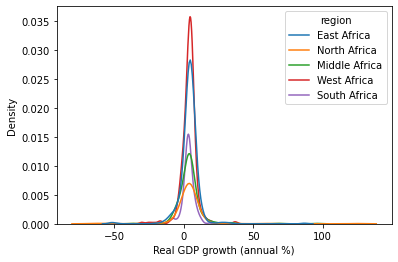

In [576]:
sns.kdeplot(data=africa_dfdropped, x= 'Real GDP growth (annual %)', hue='region');
#figsize=(199,199)
#plt.title('Regional GDP Growth', fontsize = 18)
#plt.rcParams["figure.figsize"] = (15, 10)
#plt.rcParams["xtick.labelsize"] = 7

>It seems like West African Countries experience an explosion of GDP growth year after year especially compared to other regions. It makes sense when you consider it includes Economic powerhouses like Nigeria for instance.

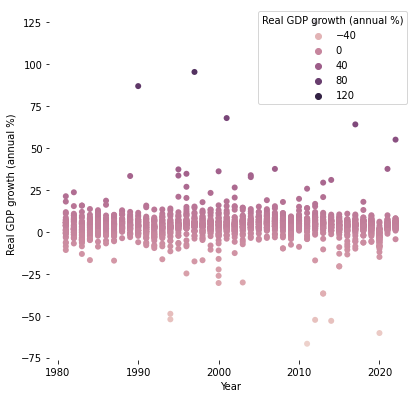

In [577]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='Year', y='Real GDP growth (annual %)', hue='Real GDP growth (annual %)',sizes=(1, 8), linewidth=0, data=africa_dfdropped, ax=ax);

>There are a few major outliers that I will need to address but generally we see positive trends in African GDP growth over the past couple of decades

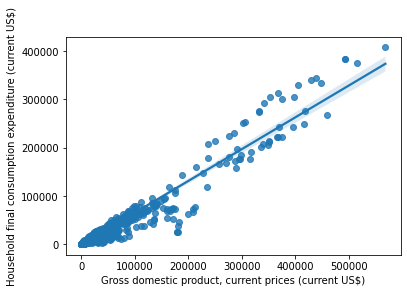

In [578]:
sns.regplot(x='Gross domestic product, current prices (current US$)', y='Household final consumption expenditure (current US$)', data=africa_dfdropped);

>Household Financial income obviously plays a big part in igniting an economic spark. When countries generally have more spending power, they typically (not always) have thriving economies. This positive correlation, I suppose will guide is in our understanding of African economics.

I think I want my target to be GDP growth per year; as GDP seems to always be a common economic growth identifier.

##**Model Development**

>K-Nearest Neighbor is the first model I want to use to accurately predicts GDP growth.

###**Train Test Split**

In [579]:
africa_dfdropped['region'] = africa_dfdropped['region'].map({'West Africa': 1, 'East Africa': 2, 'Middle Africa': 3, 'South Africa': 4, 'North Africa': 5})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [580]:
X = africa_dfdropped.drop(columns= ['Real GDP growth (annual %)', 'Year', 'Country'])

y = africa_dfdropped['Real GDP growth (annual %)']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [581]:
scaler = StandardScaler()

ohe = OneHotEncoder(sparse=False)

scaled_df = scaler.fit_transform(X_train)

###**PCA Feature Reduction**

>The model I want to use (K Nearest Neighbors) does not perform very efficiently with a lot of features so I am going to reduce my number of features with PCA

In [582]:
#fit data using PCA
pca = PCA()

In [583]:
X.shape

(2013, 29)

>Looks like our graph seems to level off at around 4 Principal Components,
so we'll use this in our PCA

**Instantiate Column Selectors**

In [584]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

**Creating both numerical and categorical pipelines**

In [585]:
#num_pipe = make_pipeline(scaler)

#cat_pipe = make_pipeline(ohe)

In [586]:
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

**Instantiate Transformers:**

In [587]:
transformer = make_column_transformer(num_tuple, cat_tuple)

pca_pipe = make_pipeline(transformer, pca)

In [588]:
africa_dfdropped['region'] = africa_dfdropped['region'].map({'West Africa': 1, 'East Africa': 2, 'Middle Africa': 3, 'South Africa': 4, 'North Africa': 5})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##**KNN**

**Instantiate the model:**

In [589]:
knn = KNeighborsRegressor()

###**Tuning Hyperparameters**

In [590]:
knn_pipe.get_params()

{'kneighborsregressor': KNeighborsRegressor(),
 'kneighborsregressor__algorithm': 'auto',
 'kneighborsregressor__leaf_size': 30,
 'kneighborsregressor__metric': 'minkowski',
 'kneighborsregressor__metric_params': None,
 'kneighborsregressor__n_jobs': None,
 'kneighborsregressor__n_neighbors': 5,
 'kneighborsregressor__p': 2,
 'kneighborsregressor__weights': 'uniform',
 'memory': None,
 'pipeline': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('standardscaler',
                                                   StandardScaler(),
                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fde1e6d6ad0>),
                                                  ('onehotencoder',
                                                   OneHotEncoder(sparse=False),
                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fde1e6d6650>)]))

In [591]:
param_grid = {'kneighborsregressor__leaf_size': [30, 20, 10], 'kneighborsregressor__n_neighbors': [5, 10, 15],'kneighborsregressor__p':[2, 4, 6]}

In [592]:
knn_grid_search = GridSearchCV(knn_pipe, param_grid)

In [593]:
%%time

knn_grid_search.fit(X_train, y_train)


CPU times: user 1min 22s, sys: 11.4 s, total: 1min 34s
Wall time: 1min 21s


GridSearchCV(estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('columntransformer',
                                                         ColumnTransformer(transformers=[('standardscaler',
                                                                                          StandardScaler(),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7fde1e6d6ad0>),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(sparse=False),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7fde1e6d6650>)])),
                                                        ('pca', PCA())]))

In [594]:
%%time
knn_grid_search.best_params_

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 11.7 µs


{'kneighborsregressor__leaf_size': 30,
 'kneighborsregressor__n_neighbors': 5,
 'kneighborsregressor__p': 2}

In [595]:
best_knn = KNeighborsRegressor(n_neighbors=5)

In [596]:
knn_pipe = make_pipeline(pca_pipe, best_knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fde1b747d90>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fde1b747a10>)])),
                                 ('pca', PCA())])),
                ('kneighborsregressor', KNeighborsRegressor())])

###**Model Predictions**

In [597]:
train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)

In [598]:
train_score = knn_pipe.score(X_train, y_train)
test_score = knn_pipe.score(X_test, y_test)

print(train_score)
print(test_score)

0.7294470521731031
0.6193571227574098


>73% accuracy on the training data for this model

##**Decision Tree**

In [600]:
dec_tree = DecisionTreeRegressor(random_state=42)

In [601]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

###**Model Predictions**

In [602]:
dec_train_preds = dec_tree.predict(X_train)
dec_test_preds = dec_tree.predict(X_test)

In [603]:
dec_train_score = dec_tree.score(X_train, y_train)
dec_test_score = dec_tree.score(X_test, y_test)

print(dec_train_score)
print(dec_test_score)

1.0
0.9233173398272357


>High Accuracy on both of these but we can tune it a bit to see more clearly

###**Tuning Hyperparameters**

In [604]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [605]:
dec_tree.get_depth()

27

In [606]:
dec_tree.get_n_leaves()

1476

>Lets try the model with different max_depths and see if we see any changes

In [612]:
dec_tree_20 = DecisionTreeRegressor(max_depth = 20, random_state = 42)
dec_tree_20.fit(X_train, y_train)
train_20_score = dec_tree_20.score(X_train, y_train)
test_20_score = dec_tree_20.score(X_test, y_test)
print(train_20_score)
print(test_20_score)


0.9999964559781651
0.9197850318627152


##**Logistic Regression**

In [615]:
reg = LinearRegression()                                                                                                                                                                                                      

In [616]:
reg.fit(X_train, y_train)

LinearRegression()

In [619]:
reg_train_preds = reg.predict(X_train)
reg_test_preds = reg.predict(X_test)

###**Regression Metrics**

####**MAE**

In [622]:
reg_train_MAE = mean_absolute_error(y_train, reg_train_preds)
reg_test_MAE = mean_absolute_error(y_test, reg_test_preds)

print(f'Reg Model Training MAE: {reg_train_MAE}')
print(f'Reg Model Testing MAE: {reg_test_MAE}')

Reg Model Training MAE: 0.614136956885909
Reg Model Testing MAE: 0.6301268573497488


####**MSE**

In [624]:
reg_train_MSE = mean_squared_error(y_train, reg_train_preds)
reg_test_MSE = mean_squared_error(y_test, reg_test_preds)

print(f'Reg Model Training MSE: {reg_train_MSE}')
print(f'Reg Model Testing MSE: {reg_test_MSE}')

Reg Model Training MSE: 0.8548041038258979
Reg Model Testing MSE: 0.7828826699720487


####**RMSE**

In [625]:
reg_train_RMSE = np.sqrt(reg_train_MSE)
reg_test_RMSE = np.sqrt(reg_test_MSE)

print(f'Reg Model Training MAE: {reg_train_RMSE}')
print(f'Reg Model Testing MAE: {reg_test_RMSE}')

Reg Model Training MAE: 0.9245561658579201
Reg Model Testing MAE: 0.8848065720664877


####**R2 Score**

In [626]:
reg_train_r2 = r2_score(y_train, reg_train_preds)
reg_test_r2 = r2_score(y_test, reg_test_preds)

print(f'Reg Model Training MSE: {reg_train_r2}')
print(f'Reg Model Testing MSE: {reg_test_r2}')

Reg Model Training MSE: 0.9857822375604344
Reg Model Testing MSE: 0.9884753127737842
